# Mathematical tools for image processing with OpenCV

TODO: introduce the topic of mathematical tools for image processing

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

In [2]:
%matplotlib tk

In [3]:
%matplotlib inline

#### 1. Load the images ‘Gauges  00.tif’, ‘Cables14.jpg’, ‘Pins-00.bmp’ and ‘Connector  01.jpg’ (`im1`, `im2`, `im3` and `im4`) and show them on a single figure.

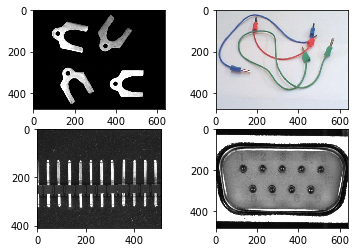

In [4]:
im1 = cv2.imread('../Images/Geometric Matching/Gauges 00.tif', 0)
im2_bgr = cv2.imread('../Images/cables/cables14.jpg', 1)
im2 = cv2.cvtColor(im2_bgr, cv2.COLOR_BGR2RGB)
im3 = cv2.imread('../Images/Pins/Pins-00.bmp', 0)
im4 = cv2.imread('../Images/Connector/Connector 01.jpg', 0)

plt.figure(0)
plt.subplot(2,2,1), plt.imshow(im1, 'gray')
plt.subplot(2,2,2), plt.imshow(im2)
plt.subplot(2,2,3), plt.imshow(im3, 'gray')
plt.subplot(2,2,4), plt.imshow(im4, 'gray')
plt.show()

#### 2. Show the image `im1` on a new figure and use the below code block to measure the distance between two pixels (euclidean distance, 4-distance, 8-distance).

```
[x, y] = plt.ginput(2)

d_e = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
d_4 = np.abs(np.diff(x)) + np.abs(np.diff(y))
d_8 = np.maximum(np.abs(np.diff(x)), np.abs(np.diff(y)))
```

In [5]:
%matplotlib tk

plt.figure(1)
plt.imshow(im1, 'gray')

[p1, p2] = plt.ginput(2)

%time d_e = np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
print("Euclidean distance:", d_e)

%time d_4 = np.abs((p1[0]-p2[0])) + np.abs((p1[1]-p2[1]))
print("4-distance:", d_4)

%time d_8 = np.maximum(np.abs((p1[0]-p2[0])), np.abs((p1[1]-p2[1])))
print("8-distance:", d_8)

/home/solano/anaconda3/envs/opencv/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 37.4 µs
Euclidean distance: 104.575699424
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25.7 µs
4-distance: 127.272727273
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.3 µs
8-distance: 101.298701299


You can see how the euclidean distance takes more time to be computed.

#### 3. Check, repeating the exercise 2, how euclidean distance is invariant to rotations, while the other measurements are not.

Just run the code of the exercise 2 measuring the distances between the arms of the gauges. As each of the 4 gauges is rotated in a different angle, you will see the differences in these measurements.

As euclidean distances are invariant to angles, 4-distances and 8-distances change depending on the rotation of the gauge.

Also, by definition, the three distances will be the same for the fourth gauge, as vertical (and horizontal) distances do not depeng on the method used for measuring distances.

#### 4. Create LUTs correspondent to *inverted ramp*, *step at level 100* and *step at level 175*. Visualize them.

A look-up table (LUT) is a function that transform a certain pixel value to another. An inverted ramp LUT would transform a black pixel (intensity = 0) into a white one (intensity = 255), and an almost white pixel (200) into an almost black one (55).

In [6]:
%matplotlib inline

In [7]:
# array from 255 to 0
lutIR = np.arange(255, -1, -1)

# step at level 100
lutS100 = np.zeros(256)
lutS100[100:] = 255

# step at level 175
lutS175 = np.zeros(256)
lutS175[175:] = 255

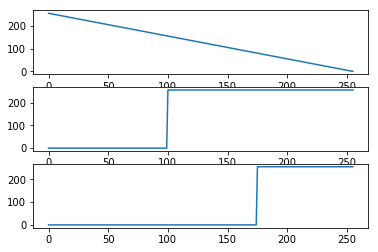

In [8]:
plt.figure(2)
plt.subplot(3,1,1), plt.plot(lutIR)
plt.subplot(3,1,2), plt.plot(lutS100)
plt.subplot(3,1,3), plt.plot(lutS175)
plt.show()

#### 5. Show in a new figure the image `im1` and the result of applying it each one of the LUTs.

To apply a LUT to an image, just type `lut[img]`. This is the magic of Python.

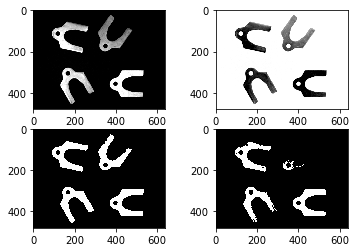

In [9]:
plt.figure(3)
plt.subplot(2,2,1), plt.imshow(im1, 'gray')
plt.subplot(2,2,2), plt.imshow(lutIR[im1], 'gray')
plt.subplot(2,2,3), plt.imshow(lutS100[im1], 'gray')
plt.subplot(2,2,4), plt.imshow(lutS175[im1], 'gray')
plt.show()

We can see how:
1. The inverted ramp ....
2. The step LUTs binarize the image, transforming from grayscale to only completely black and completely white. The step level marks the threshold ... 

#### 6. Repeat the exercise 6 with the images `im3` and `im4`.

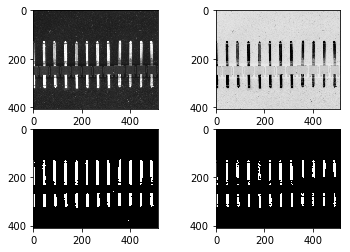

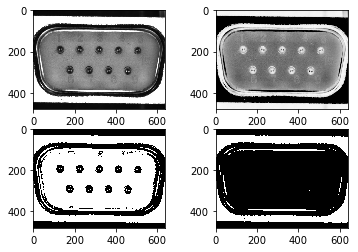

In [10]:
plt.figure(4)
plt.subplot(2,2,1), plt.imshow(im3, 'gray')
plt.subplot(2,2,2), plt.imshow(lutIR[im3], 'gray')
plt.subplot(2,2,3), plt.imshow(lutS100[im3], 'gray')
plt.subplot(2,2,4), plt.imshow(lutS175[im3], 'gray')
plt.show()

plt.figure(5)
plt.subplot(2,2,1), plt.imshow(im4, 'gray')
plt.subplot(2,2,2), plt.imshow(lutIR[im4], 'gray')
plt.subplot(2,2,3), plt.imshow(lutS100[im4], 'gray')
plt.subplot(2,2,4), plt.imshow(lutS175[im4], 'gray')
plt.show()

#### 7. Visualize the histogram of the image `im4`.

Histograms show the number of pixels that with a certain value. 

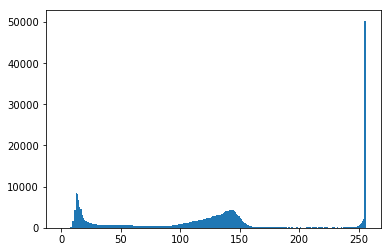

In [11]:
plt.figure(6)
plt.hist(im4.ravel(), 256, [0,256]);
plt.show()

In [12]:
# ravel() transforms a multimensional array into a 1-D array

my_array =  np.arange(9).reshape(3,3)

print(my_array)
print(my_array.ravel())

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


#### 9. Convert the image `im2` into HSV format and show the histogram of the hue (H) component.

In [13]:
im5 = cv2.cvtColor(im2, cv2.COLOR_RGB2HSV)

In [14]:
im5h = im5[:,:,0] * (im5[:,:,1] > 25).astype(np.int8) # if saturation is low, set its hue to zero.

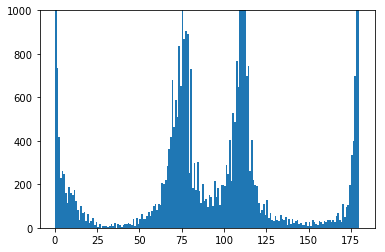

In [15]:
plt.figure(7)

plt.hist(im5h.ravel(), 180, [0,180]);

axes = plt.gca()
axes.set_ylim([0, 1000])

plt.show()

#### 10. Show the image `im2` and the normalized histogram of its R field.

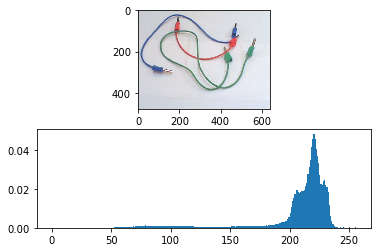

In [16]:
num_pixels = im2.shape[0]*im2.shape[1]

im2_R = im2[:,:,0]
weights_R = np.ones_like(im2_R.ravel())/num_pixels

plt.figure(8)
plt.subplot(2,1,1), plt.imshow(im2)
plt.subplot(2,1,2), plt.hist(im2_R.ravel(), 256, [0,256], weights=weights_R)
plt.show()

#### 11. Apply an average filter to 3x3, 9x9 and 18x18 regions of the image `im4` using convolution (`im6`, `im7` and `im8`).

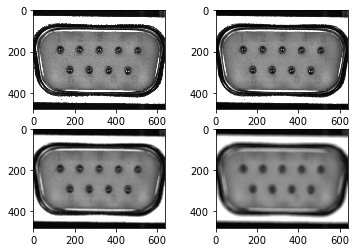

In [17]:
m3 = np.ones((3, 3))/9
m9 = np.ones((9, 9))/81
m18 = np.ones((18, 18))/(18**2)

im6 = cv2.filter2D(im4, -1, m3)
im7 = cv2.filter2D(im4, -1, m9)
im8 = cv2.filter2D(im4, -1, m18)

plt.figure(9)
plt.subplot(2,2,1), plt.imshow(im4, 'gray')
plt.subplot(2,2,2), plt.imshow(im6, 'gray')
plt.subplot(2,2,3), plt.imshow(im7, 'gray')
plt.subplot(2,2,4), plt.imshow(im8, 'gray')
plt.show()

#### 12. Visualize `im8` as a surface.

In [18]:
# work in progress

#### 13. Localize the pins in the image `im4` using normalized cross-correlation

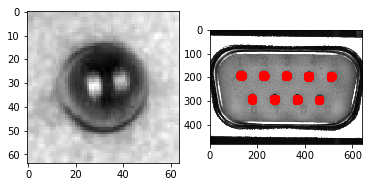

In [19]:
template = np.copy(im4[160:224, 100:164])

imc = cv2.matchTemplate(im4, template, method=cv2.TM_CCORR_NORMED)
loc = np.argwhere(imc>0.97)
x = loc[:, 1]
y = loc[:, 0]

plt.figure(10)
plt.subplot(1,2,1), plt.imshow(template, 'gray')
plt.subplot(1,2,2), plt.imshow(im4, 'gray'), plt.plot(x+32, y+32, 'ro')
plt.show()

#### 14. Visualize `imc` both as an image and as a surface.

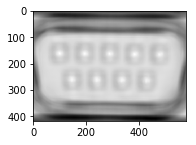

In [20]:
plt.figure(11)
plt.subplot(1,2,1), plt.imshow(imc, 'gray')
# work in progress
plt.show()

#### 15. Localize the holes in the image `im1` using cross-correlation.

#### 16. Show the Fourier spectrum of the image `im1` centered and not centered.

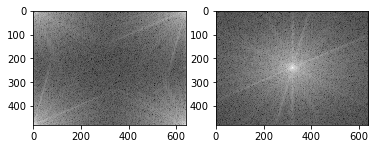

In [21]:
im1_fft = np.fft.fft2(im1)

im1_esp = 20*np.log(np.abs(im1_fft))

im1_fft_c = np.fft.fftshift(im1_fft)
im1_esp_c = 20*np.log(np.abs(im1_fft_c))

plt.figure(13)
plt.subplot(1,2,1), plt.imshow(im1_esp, 'gray')
plt.subplot(1,2,2), plt.imshow(im1_esp_c, 'gray')
plt.show()

#### 17. Show the image `im3` along with its centerd spectrum.

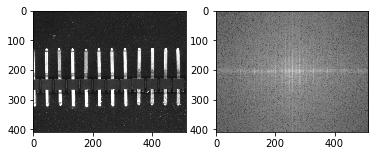

In [22]:
im3_fft = np.fft.fft2(im3)
im3_fft_c = np.fft.fftshift(im3_fft)
im3_esp_c = 20*np.log(np.abs(im3_fft_c))

plt.figure(14)
plt.subplot(1,2,1), plt.imshow(im3, 'gray')
plt.subplot(1,2,2), plt.imshow(im3_esp_c, 'gray')
plt.show()

#### 18. Perform a convolution in the frequency domain to the image `im4` with an average kernel of size (18, 18) .

In [23]:
# work in progress

#### 19. Check how the inverse of the Fourier transform returns the original image.

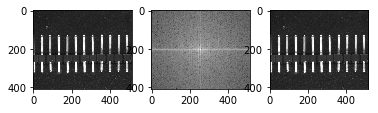

In [24]:
im3_again = np.abs(np.fft.ifft2(np.fft.fftshift(im3_fft_c)))

plt.figure(16)
plt.subplot(1,3,1), plt.imshow(im3, 'gray')
plt.subplot(1,3,2), plt.imshow(im3_esp_c, 'gray')
plt.subplot(1,3,3), plt.imshow(im3_again, 'gray')
plt.show()